In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.style as style
style.use('fivethirtyeight')
import math
import random

In [2]:
with open('../pickles/google.pkl', 'rb') as f:
    data = pickle.load(f)
    
top_50 = data.head(50)

# Top 50 Videos

## Top 50 Videos Categories

In [3]:
# Categories to be featured
top_50_cats = top_50.category.unique().tolist()

top_50_avg_views = {}
top_50_total_views = {}

for cat in top_50_cats:
    mean_views = top_50.loc[top_50.category == cat, 'viewCount'].mean()
    total_views = top_50.loc[top_50.category == cat, 'viewCount'].sum()
    if cat in top_50_avg_views:
        pass
    else:
        top_50_avg_views[cat] = int(mean_views)
    
    if cat in top_50_total_views:
        pass
    else:
        top_50_total_views[cat] = float(total_views)

## Top 50, Average Views

Text(0.5,1,'Top 50 Videos, Average Views by Category')

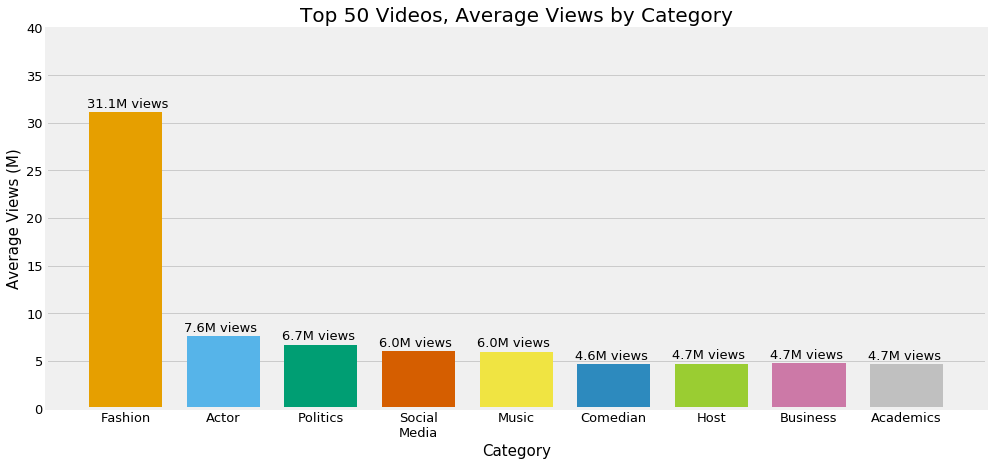

In [4]:
%matplotlib inline

values = list(top_50_avg_views.values())
sizes = [x/1000000 for x in values]
keys = top_50_avg_views.keys()

order = ['Fashion', 'Actor', 'Politics', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics']

t50avg = pd.DataFrame({'Category' : list(keys),
                       'Views': sizes})
t50avg = t50avg.set_index("Category").loc[order]

fig, ax = plt.subplots(figsize=(15,7))

colors = [[230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], [213/255,94/255,0],
          [240/255,228/255,66/255], [45/255,138/255,190/255], 'yellowgreen', [204/255,121/255,167/255], 'silver']

ax.bar(order, t50avg.Views, width = .75, color = colors)
ax.set_xticklabels(order, fontsize=13, ha='center', rotation=0)
ax.set_xticks(order)
ax.set_yticklabels((range(0, math.ceil(max(sizes)/15) * 15, 5)), fontsize=13)
ax.set_ylim(0, math.ceil(max(t50avg.Views)/10)*10)
ax.xaxis.grid(False)
for i, v in enumerate(sizes):
    plt.text(i-.4, v + 0.5, '{:.1f}M views'.format(v), fontsize=13)
ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Average Views (M)', fontsize=15)
ax.set_title('Top 50 Videos, Average Views by Category', fontsize=20, y=1)

## Top 50, Total Views

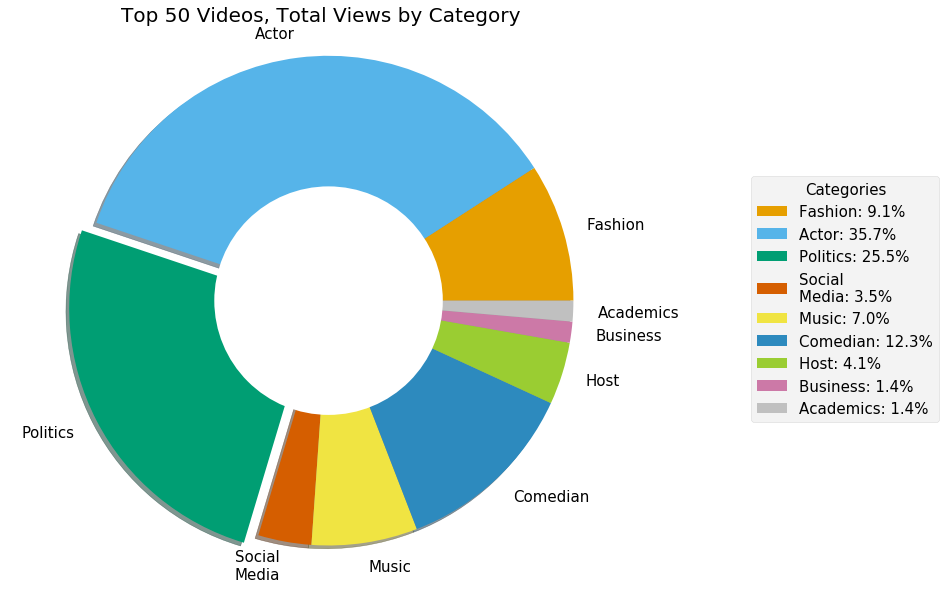

In [5]:
%matplotlib inline

total = sum(top_50_total_views.values())
sizes = top_50_total_views.values()
keys = top_50_total_views.keys()

order = ['Fashion', 'Actor', 'Politics', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics']

t50tot = pd.DataFrame({'Category' : list(keys),
                       'Views': list(sizes)})
t50tot = t50tot.set_index("Category").loc[order]

plt.figure(figsize=[10,10])

labels = ['{}: {:.1%}'.format(i, j/total) for i, j in zip(order, t50tot.Views)]

colors = [[230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], [213/255,94/255,0],
          [240/255,228/255,66/255], [45/255,138/255,190/255], 'yellowgreen', [204/255,121/255,167/255], 'silver']
explode = (0, 0, .1, 0, 0, 0, 0, 0, 0)
 
# Plot
plt.rcParams['font.size'] = 15
plt.pie(t50tot.Views, labels = order, pctdistance=.875, shadow=True, 
        startangle=0, radius=1.5, colors = colors, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels,
          title="Categories",
          loc="right",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15
          )

plt.axis('equal')
plt.title("Top 50 Videos, Total Views by Category", fontsize=20)
plt.show()

Of the top 50 videos by views, the Fashion category has the highest average views (31M), all from one video. The video, an interview with model Sarah McDaniel, is also Colbert's most viewed interview of all time, nearly doubling the views of the second place entry, an interview with actor Bruce Willis (19M views). McDaniel's interview seems to have received outsize attention due to her top nearly falling off several times during the clip.

Bruce Willis' interview was atypical in that it was a choreographed extended fight scene between Willis and Colbert with stuntmen standing in for hard falls and collisions. This unique angle also seems to have driven the view count to 19 million.

The third, fourth, and fifth most viewed interviews all registered ~14.5M views. We'll look at a "normalized" version of the top 50 videos that excludes the Sarah McDaniel and Bruce Willis interviews.

# Top 50 Videos, Normalized

Let's look at the top 50 interviews, excluding the Sarah McDaniel and Bruce Willis interviews.

In [6]:
top_50_normalized = data[2:52]

## Top 50 Videos Categories (normalized)

In [7]:
top_50_normalized_cats = top_50_normalized.category.unique().tolist()

top_50_normalized_avg_views = {}
top_50_normalized_total_views = {}

for cat in top_50_normalized_cats:
    mean_views = top_50_normalized.loc[top_50_normalized.category == cat, 'viewCount'].mean()
    total_views = top_50_normalized.loc[top_50_normalized.category == cat, 'viewCount'].sum()
    if cat in top_50_normalized_avg_views:
        pass
    else:
        top_50_normalized_avg_views[cat] = int(mean_views)
    
    if cat in top_50_normalized_total_views:
        pass
    else:
        top_50_normalized_total_views[cat] = float(total_views)

## Top 50, Average Views (normalized)

Text(0.5,1,'Top 50 Videos, Average Views by Category (normalized)')

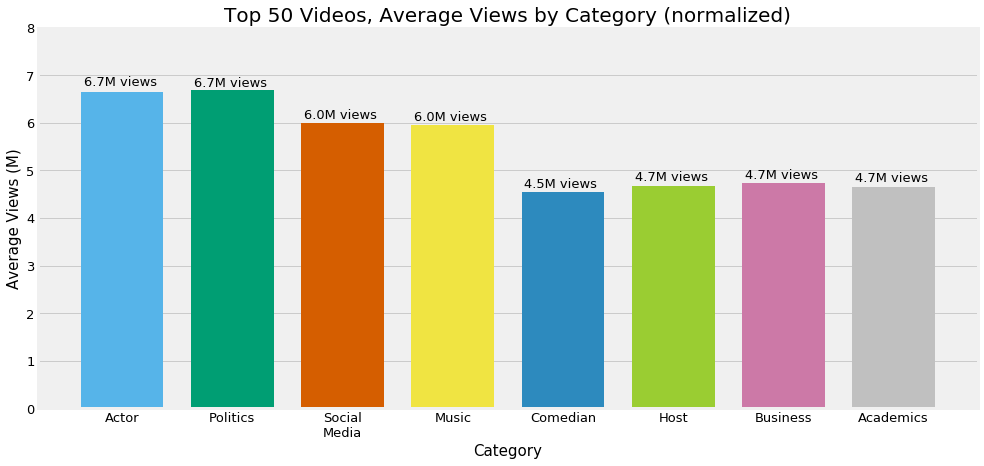

In [8]:
%matplotlib inline

values = list(top_50_normalized_avg_views.values())
sizes = [x/1000000 for x in values]
keys = top_50_normalized_avg_views.keys()

order = ['Actor', 'Politics', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics']

t50normavg = pd.DataFrame({'Category' : list(keys),
                       'Views': sizes})
t50normavg = t50normavg.set_index("Category").loc[order]

fig, ax = plt.subplots(figsize=(15,7))

colors = [[86/255,180/255,233/255], [0,158/255,115/255], [213/255,94/255,0],
          [240/255,228/255,66/255], [45/255,138/255,190/255], 'yellowgreen', [204/255,121/255,167/255], 'silver']

ax.bar(order, t50normavg.Views, width = .75, color = colors)
ax.set_xticks(order)
ax.set_xticklabels(order, fontsize=13, ha='center', rotation=0)
ax.set_yticklabels(range(0, 10,1), fontsize=13)
ax.set_ylim(0, 8)
ax.xaxis.grid(False)
for i, v in enumerate(sizes):
    plt.text(i-.35, v + 0.1, '{:.1f}M views'.format(v), fontsize=13)
ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Average Views (M)', fontsize=15)
ax.set_title('Top 50 Videos, Average Views by Category (normalized)', fontsize=20, y=1)

## Top 50, Total Views (normalized)

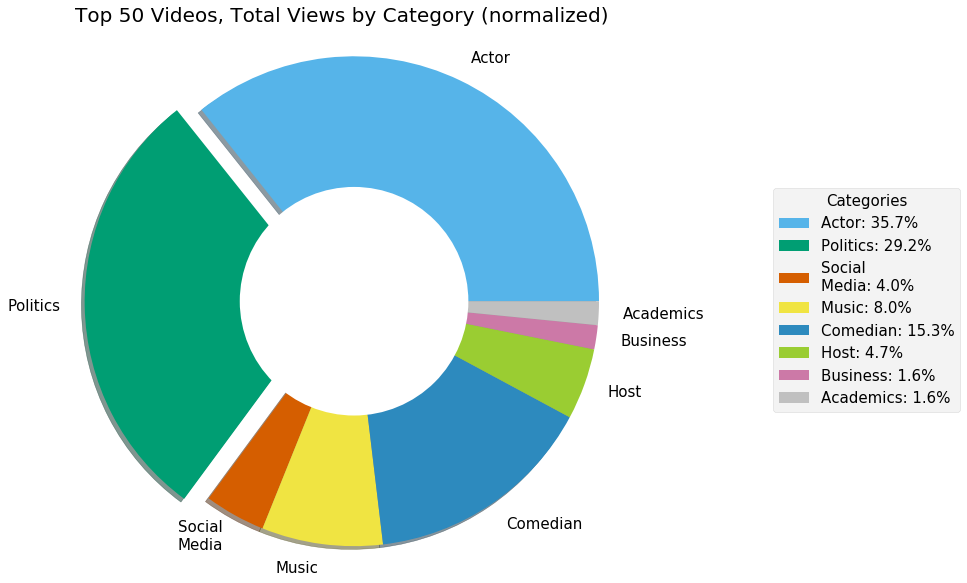

In [9]:
%matplotlib inline

total = sum(top_50_normalized_total_views.values())
sizes = top_50_normalized_total_views.values()
keys = top_50_normalized_total_views.keys()

order = ['Actor', 'Politics', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics']

t50normtot = pd.DataFrame({'Category' : list(keys),
                       'Views': list(sizes)})
t50normtot = t50normtot.set_index("Category").loc[order]

plt.figure(figsize=[10,10])

labels = ['{}: {:.1%}'.format(i, j/total) for i, j in zip(order, t50normtot.Views)]

colors = [[86/255,180/255,233/255], [0,158/255,115/255], [213/255,94/255,0],
          [240/255,228/255,66/255], [45/255,138/255,190/255], 'yellowgreen', [204/255,121/255,167/255], 'silver']
explode = (0, .15, 0, 0, 0, 0, 0, 0)
 
# Plot
plt.rcParams['font.size'] = 15
plt.pie(t50normtot.Views, labels = order, pctdistance=.875, explode = explode,
        shadow=True, startangle=0, radius=1.5, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels,
          title="Categories",
          loc="right",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15
          )

plt.axis('equal')
plt.title("Top 50 Videos, Total Views by Category (normalized)", fontsize=20)
plt.show()

Under this normalized view, the Politics category snags an even larger piece of the pie, jumping from 25% to 29%. Politics also barely beats the Actors category on an average views basis.

# Top 50 Videos, Normalized, New Categories

Now, we turn to the `new_cat` feature, which is meant to categorize any video that mentions President Trump in its title as a politics video.

## Top 50, Average Views Categories (normalized, new categories)

In [10]:
top_50_normalized_NC_cats = top_50_normalized.new_cat.unique().tolist()

top_50_normalized_NC_avg_views = {}
top_50_normalized_NC_total_views = {}

for cat in top_50_normalized_NC_cats:
    mean_views = top_50_normalized.loc[top_50_normalized.new_cat == cat, 'viewCount'].mean()
    total_views = top_50_normalized.loc[top_50_normalized.new_cat == cat, 'viewCount'].sum()
    if cat in top_50_normalized_NC_avg_views:
        pass
    else:
        top_50_normalized_NC_avg_views[cat] = int(mean_views)
    
    if cat in top_50_normalized_NC_total_views:
        pass
    else:
        top_50_normalized_NC_total_views[cat] = float(total_views)

## Top 50, Average Views (normalized, new categories)

Text(0.5,1,'Top 50 Videos, Average Views by Category (normalized, new categories)')

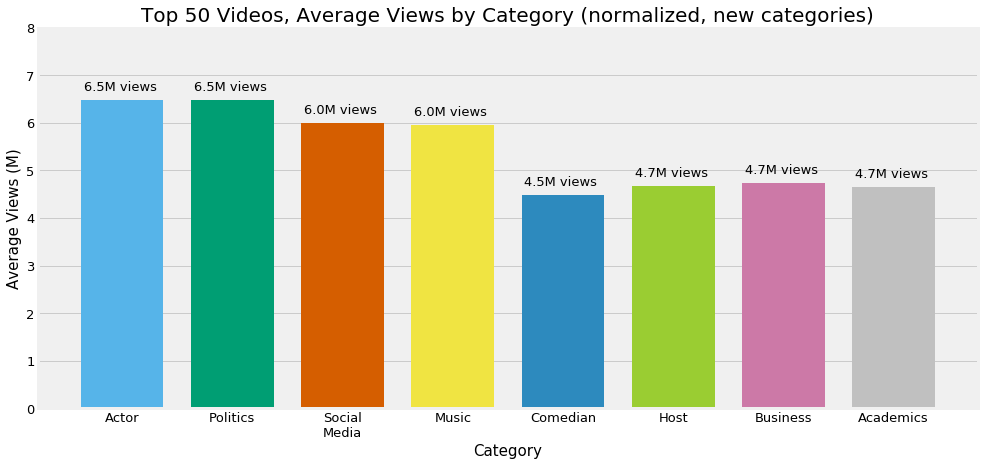

In [11]:
%matplotlib inline

values = list(top_50_normalized_NC_avg_views.values())
sizes = [x/1000000 for x in values]
keys = top_50_normalized_NC_avg_views.keys()

order = ['Actor', 'Politics', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics']

t50normncavg = pd.DataFrame({'Category' : list(keys),
                       'Views': sizes})
t50normncavg = t50normncavg.set_index("Category").loc[order]

fig, ax = plt.subplots(figsize=(15,7))

colors = [[86/255,180/255,233/255], [0,158/255,115/255], [213/255,94/255,0],
          [240/255,228/255,66/255], [45/255,138/255,190/255], 'yellowgreen', [204/255,121/255,167/255], 'silver']

ax.bar(order, t50normncavg.Views, width = .75, color = colors)
ax.set_xticks(order)
ax.set_xticklabels(order, fontsize=13, ha='center', rotation=0)
ax.set_yticklabels(range(0, 10,1), fontsize=13)
ax.set_ylim(0, 8)
ax.xaxis.grid(False)
for i, v in enumerate(sizes):
    plt.text(i-.35, v + 0.2, '{:.1f}M views'.format(v), fontsize=13)
ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Average Views (M)', fontsize=15)
ax.set_title("Top 50 Videos, Average Views by Category (normalized, new categories)", fontsize=20, y=1)

## Top 50, Total Views (normalized, new categories)

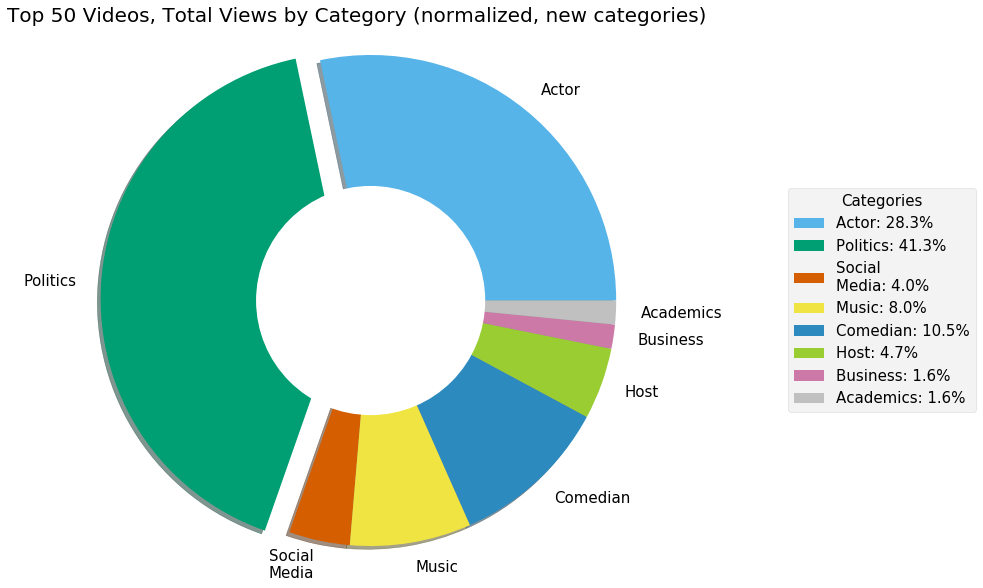

In [12]:
%matplotlib inline

total = sum(top_50_normalized_NC_total_views.values())
sizes = top_50_normalized_NC_total_views.values()
keys = top_50_normalized_NC_total_views.keys()

order = ['Actor', 'Politics', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics']

t50totnormnc = pd.DataFrame({'Category' : list(keys),
                       'Views': list(sizes)})
t50totnormnc = t50totnormnc.set_index("Category").loc[order]

plt.figure(figsize=[10,10])

labels = ['{}: {:.1%}'.format(i, j/total) for i, j in zip(order, t50totnormnc.Views)]

colors = [[86/255,180/255,233/255], [0,158/255,115/255], [213/255,94/255,0],
          [240/255,228/255,66/255], [45/255,138/255,190/255], 'yellowgreen', [204/255,121/255,167/255], 'silver']
explode = (0, .15, 0, 0, 0, 0, 0, 0)
 
# Plot
plt.rcParams['font.size'] = 15
plt.pie(t50totnormnc.Views, labels = order, pctdistance=.875, explode = explode,
        shadow=True, startangle=0, radius=1.5, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels,
          title="Categories",
          loc="right",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15
          )

plt.axis('equal')
plt.title("Top 50 Videos, Total Views by Category (normalized, new categories)", fontsize=20)
plt.show()

Under this view, Politics videos take the dominant share of top 50 videos with 41%. As is the case with the normalized top 50 view, Politics videos also edge out the Actors category on an average views basis.

# All Videos

## All Videos Categories

In [13]:
overall_cats = data.category.unique().tolist()

overall_avg_views = {}
overall_total_views = {}

for cat in overall_cats:
    mean_views = data.loc[data.category == cat, 'viewCount'].mean()
    total_views = data.loc[data.category == cat, 'viewCount'].sum()
    if cat in overall_avg_views:
        pass
    else:
        overall_avg_views[cat] = mean_views
    
    if cat in overall_total_views:
        pass
    else:
        overall_total_views[cat] = total_views

## All Videos, Average Views

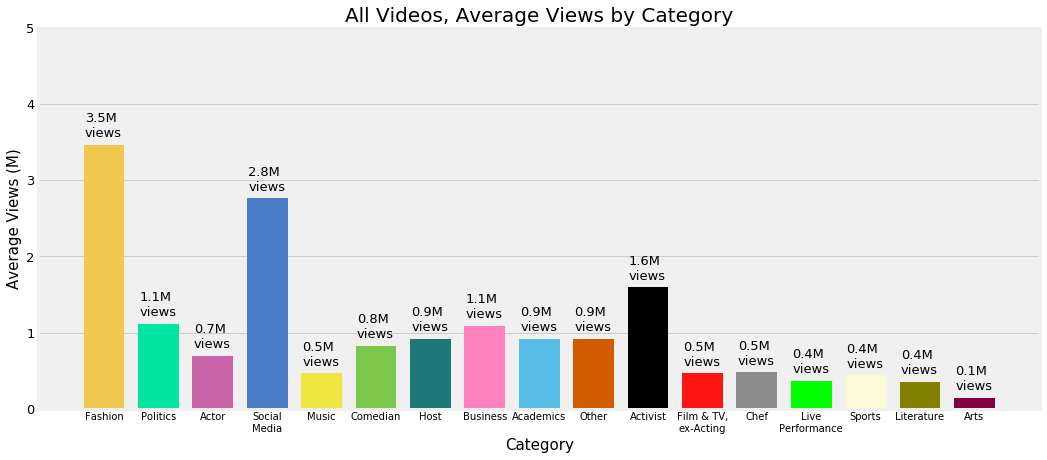

In [14]:
%matplotlib inline

values = list(overall_avg_views.values())
sizes = [x/1000000 for x in values]
keys = overall_avg_views.keys()

fig, ax = plt.subplots(figsize=(16,7))

order = ['Fashion', 'Politics', 'Actor', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics', 'Other',
         'Activist', 'Film & TV,\nex-Acting', 'Chef', 'Live\nPerformance', 'Sports', 'Literature', 'Arts']

allavg = pd.DataFrame({'Category' : list(keys),
                       'Views': sizes})
allavg = allavg.set_index("Category").loc[order]

colors = [(240/255, 200/255, 80/255), (0/255, 230/255, 160/255), (200/255, 100/255, 170/255), (75/255, 125/255, 200/255),
          (240/255, 230/255, 65/255), (125/255, 200/255, 75/255), (30/255, 120/255, 120/255), (255/255, 130/255, 190/255),
          (86/255, 190/255, 230/255), (210/255, 90/255, 0/255), (0/255, 0/255, 0/255), (255/255, 20/255, 20/255),
         (140/255, 140/255, 140/255), (0/255, 255/255, 0/255), (250/255, 250/255, 215/255), (130/255, 130/255, 0/255),
          (130/255, 0/255, 65/255)]

ax.bar(order, allavg.Views, width = .75, color = colors)
ax.set_xticks(order)
ax.set_xticklabels(order, fontsize=10, ha='center', rotation=0)
ax.set_yticklabels(range(0, 6,1), fontsize=13)
ax.set_ylim(0, 5)
ax.xaxis.grid(False)
for i, v in enumerate(allavg.Views):
    plt.text(i - .35, v + 0.1, '{:.1f}M\nviews'.format(v), fontsize=13)
ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Average Views (M)', fontsize=15)
ax.set_title("All Videos, Average Views by Category", fontsize=20, y=1)
plt.show()

## All Videos, Total Views

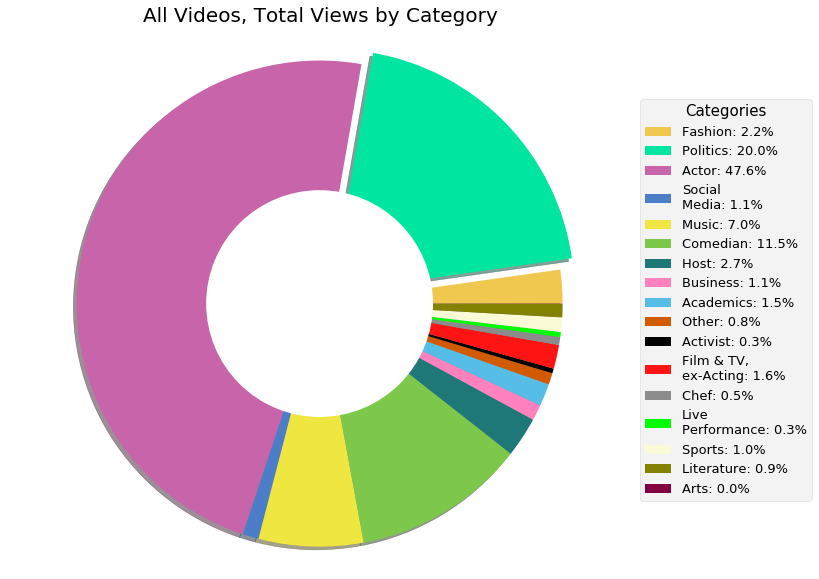

In [15]:
%matplotlib inline

total = sum(overall_total_views.values())
sizes = overall_total_views.values()
keys = overall_total_views.keys()

order = ['Fashion', 'Politics', 'Actor', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics', 'Other',
         'Activist', 'Film & TV,\nex-Acting', 'Chef', 'Live\nPerformance', 'Sports', 'Literature', 'Arts']

alltot = pd.DataFrame({'Category' : list(keys),
                       'Views': list(sizes)})
alltot = alltot.set_index("Category").loc[order]

plt.figure(figsize=[10,10])

labels = ['{}: {:.1%}'.format(i, j/total) for i, j in zip(order, alltot.Views)]

colors = [(240/255, 200/255, 80/255), (0/255, 230/255, 160/255), (200/255, 100/255, 170/255), (75/255, 125/255, 200/255),
          (240/255, 230/255, 65/255), (125/255, 200/255, 75/255), (30/255, 120/255, 120/255), (255/255, 130/255, 190/255),
          (86/255, 190/255, 230/255), (210/255, 90/255, 0/255), (0/255, 0/255, 0/255), (255/255, 20/255, 20/255),
         (140/255, 140/255, 140/255), (0/255, 255/255, 0/255), (250/255, 250/255, 215/255), (130/255, 130/255, 0/255),
          (130/255, 0/255, 65/255)]
explode = (0, .1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
 
# Plot
plt.rcParams['font.size'] = 15
plt.pie(alltot.Views, pctdistance=.875, explode = explode,
        shadow=True, startangle=0, radius=1.5, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=13
          )

plt.axis('equal')
plt.title("All Videos, Total Views by Category", fontsize=20)
plt.show()

YouTubers PewDiePie, Sean Evans, and Liza Koshy all cut interviews with Colbert that attracted substantial amounts of clicks. This has given the Social Media category the second highest average view count among all categories.

The Activist category, which could arguably be considered part of the Politics category, draws 1.6M views on average due mainly to interviews with Malala Yousafzai and Black Lives Matter activist DeRay McKesson.

# All Videos, Normalized

In [16]:
data_normalized = data[2:]

## All Videos Categories (normalized)

In [17]:
overall_normalized_cats = data_normalized.category.unique().tolist()

overall_normalized_avg_views = {}
overall_normalized_total_views = {}

for cat in overall_cats:
    mean_views = data_normalized.loc[data_normalized.category == cat, 'viewCount'].mean()
    total_views = data_normalized.loc[data_normalized.category == cat, 'viewCount'].sum()
    if cat in overall_normalized_avg_views:
        pass
    else:
        overall_normalized_avg_views[cat] = mean_views
    
    if cat in overall_normalized_total_views:
        pass
    else:
        overall_normalized_total_views[cat] = total_views

## All Videos, Average Views (normalized)

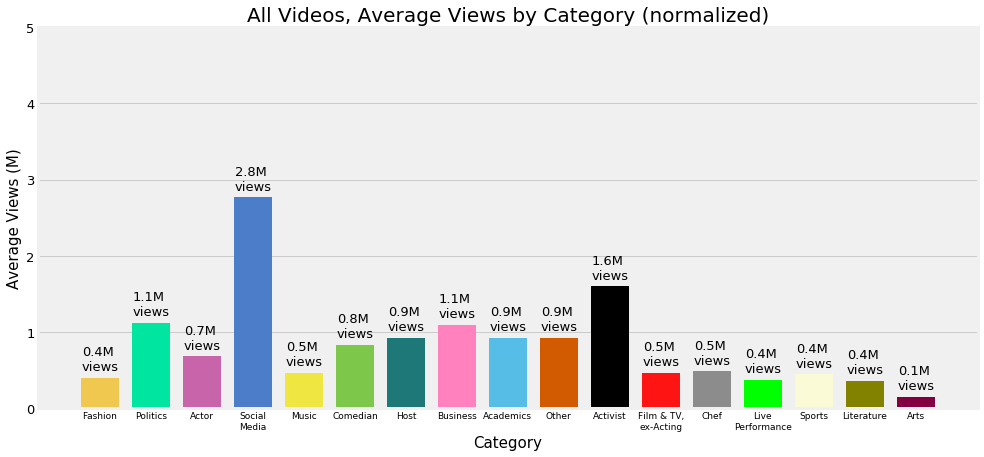

In [18]:
%matplotlib inline


values = list(overall_normalized_avg_views.values())
sizes = [x/1000000 for x in values]
keys = overall_normalized_avg_views.keys()

order = ['Fashion', 'Politics', 'Actor', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics', 'Other',
         'Activist', 'Film & TV,\nex-Acting', 'Chef', 'Live\nPerformance', 'Sports', 'Literature', 'Arts']

allavgnorm = pd.DataFrame({'Category' : list(keys),
                           'Views': sizes})
allavgnorm = allavgnorm.set_index("Category").loc[order]

fig, ax = plt.subplots(figsize=(15,7))

colors = [(240/255, 200/255, 80/255), (0/255, 230/255, 160/255), (200/255, 100/255, 170/255), (75/255, 125/255, 200/255),
          (240/255, 230/255, 65/255), (125/255, 200/255, 75/255), (30/255, 120/255, 120/255), (255/255, 130/255, 190/255),
          (86/255, 190/255, 230/255), (210/255, 90/255, 0/255), (0/255, 0/255, 0/255), (255/255, 20/255, 20/255),
         (140/255, 140/255, 140/255), (0/255, 255/255, 0/255), (250/255, 250/255, 215/255), (130/255, 130/255, 0/255),
          (130/255, 0/255, 65/255)]

ax.bar(order, allavgnorm.Views, width = .75, color = colors)
ax.set_xticks(order)
ax.set_xticklabels(order, fontsize=9, ha='center', rotation=0)

ax.set_yticklabels(range(0, 6,1), fontsize=13)
ax.set_ylim(0, 5)
ax.xaxis.grid(False)
for i, v in enumerate(allavgnorm.Views):
    plt.text(i-.35, v + 0.1, '{:.1f}M\nviews'.format(v), fontsize=13)
ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Average Views (M)', fontsize=15)
ax.set_title("All Videos, Average Views by Category (normalized)", fontsize=20, y=1)
plt.show()

## All Videos, Total Views (normalized)

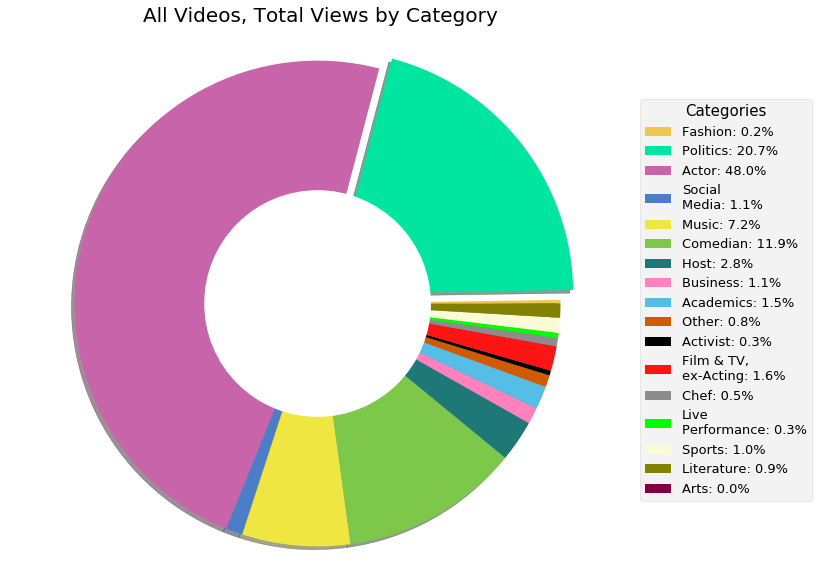

In [19]:
%matplotlib inline

total = sum(overall_normalized_total_views.values())
sizes = overall_normalized_total_views.values()
keys = overall_normalized_total_views.keys()

order = ['Fashion', 'Politics', 'Actor', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics', 'Other',
         'Activist', 'Film & TV,\nex-Acting', 'Chef', 'Live\nPerformance', 'Sports', 'Literature', 'Arts']

alltotnorm = pd.DataFrame({'Category' : list(keys),
                           'Views': list(sizes)})
alltotnorm = alltotnorm.set_index("Category").loc[order]

plt.figure(figsize=[10,10])

labels = ['{}: {:.1%}'.format(i, j/total) for i, j in zip(order, alltotnorm.Views)]

colors = [(240/255, 200/255, 80/255), (0/255, 230/255, 160/255), (200/255, 100/255, 170/255), (75/255, 125/255, 200/255),
          (240/255, 230/255, 65/255), (125/255, 200/255, 75/255), (30/255, 120/255, 120/255), (255/255, 130/255, 190/255),
          (86/255, 190/255, 230/255), (210/255, 90/255, 0/255), (0/255, 0/255, 0/255), (255/255, 20/255, 20/255),
         (140/255, 140/255, 140/255), (0/255, 255/255, 0/255), (250/255, 250/255, 215/255), (130/255, 130/255, 0/255),
          (130/255, 0/255, 65/255)]
explode = (0, .1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
 
# Plot
plt.rcParams['font.size'] = 15
plt.pie(alltotnorm.Views, pctdistance=.875, explode = explode,
        shadow=True, startangle=0, radius=1.5, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=13
          )

plt.axis('equal')
plt.title("All Videos, Total Views by Category", fontsize=20)
plt.show()

Under the normalized view for all videos, Fashion interview representation nearly evaporates to 0.2%, down from 2.2% in the standard view. The Actors and Politics categories combined still comprise 2/3rds of all views.

# All Videos, Normalized, New Categories

## All Videos Categories (normalized, new categories)

In [20]:
overall_normalized_NC_cats = data_normalized.new_cat.unique().tolist()

overall_normalized_NC_avg_views = {}
overall_normalized_NC_total_views = {}

for cat in overall_cats:
    mean_views = data_normalized.loc[data_normalized.new_cat == cat, 'viewCount'].mean()
    total_views = data_normalized.loc[data_normalized.new_cat == cat, 'viewCount'].sum()
    if cat in overall_normalized_NC_avg_views:
        pass
    else:
        overall_normalized_NC_avg_views[cat] = mean_views
    
    if cat in overall_normalized_NC_total_views:
        pass
    else:
        overall_normalized_NC_total_views[cat] = total_views

## All Videos, Average Views (normalized, new categories)

<Figure size 720x720 with 0 Axes>

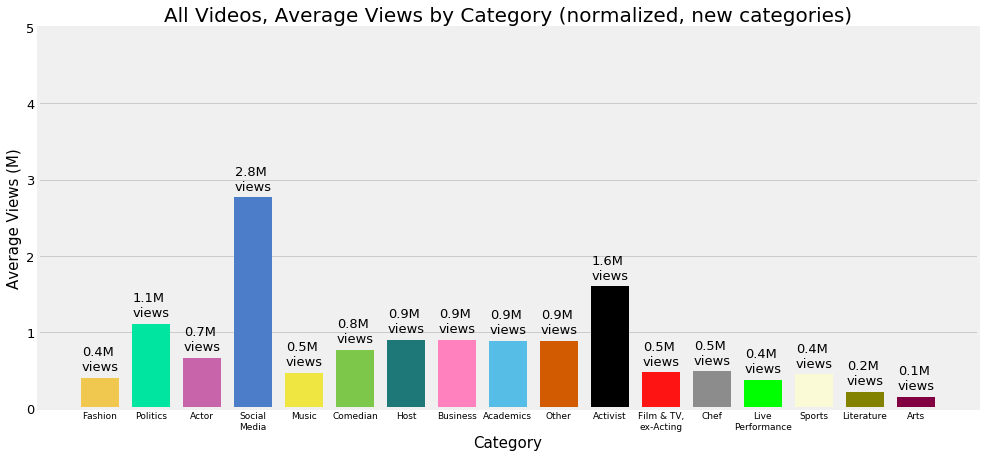

In [21]:
plt.figure(figsize=[10,10])

values = list(overall_normalized_NC_avg_views.values())
sizes = [x/1000000 for x in values]
keys = overall_normalized_NC_avg_views.keys()

order = ['Fashion', 'Politics', 'Actor', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics', 'Other',
         'Activist', 'Film & TV,\nex-Acting', 'Chef', 'Live\nPerformance', 'Sports', 'Literature', 'Arts']

allavgnormnc = pd.DataFrame({'Category' : list(keys),
                             'Views': sizes})
allavgnormnc = allavgnormnc.set_index("Category").loc[order]

fig, ax = plt.subplots(figsize=(15,7))

colors = [(240/255, 200/255, 80/255), (0/255, 230/255, 160/255), (200/255, 100/255, 170/255), (75/255, 125/255, 200/255),
          (240/255, 230/255, 65/255), (125/255, 200/255, 75/255), (30/255, 120/255, 120/255), (255/255, 130/255, 190/255),
          (86/255, 190/255, 230/255), (210/255, 90/255, 0/255), (0/255, 0/255, 0/255), (255/255, 20/255, 20/255),
         (140/255, 140/255, 140/255), (0/255, 255/255, 0/255), (250/255, 250/255, 215/255), (130/255, 130/255, 0/255),
          (130/255, 0/255, 65/255)]

ax.bar(order, allavgnormnc.Views, width = .75, color = colors)
ax.set_xticks(order)
ax.set_xticklabels(order, fontsize=9, ha='center', rotation=0)

ax.set_yticklabels(range(0, 6,1), fontsize=13)
ax.set_ylim(0, 5)
ax.xaxis.grid(False)
for i, v in enumerate(allavgnormnc.Views):
    plt.text(i-.35, v + 0.1, '{:.1f}M\nviews'.format(v), fontsize=13)
ax.set_xlabel('Category', fontsize=15)
ax.set_ylabel('Average Views (M)', fontsize=15)
ax.set_title("All Videos, Average Views by Category (normalized, new categories)", fontsize=20, y=1)
plt.show()

## All Videos, Total Views (normalized, new categories)

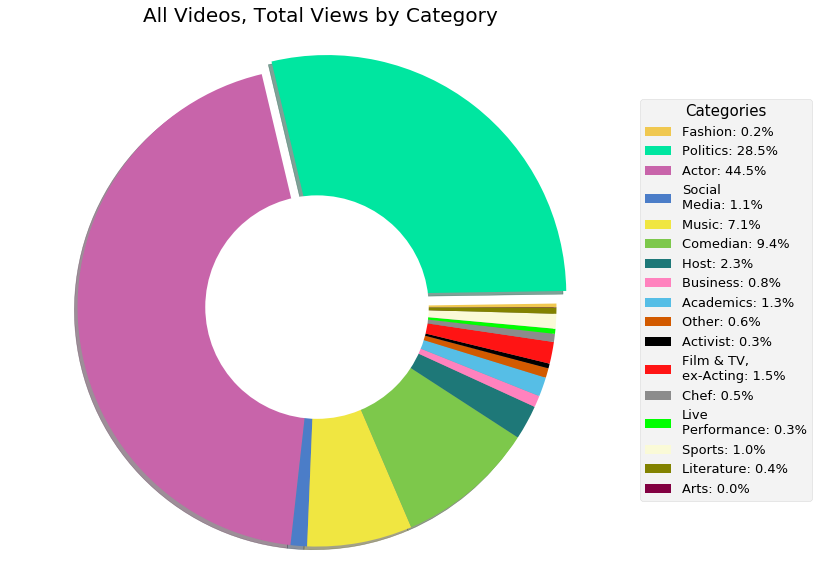

In [22]:
%matplotlib inline

total = sum(overall_normalized_NC_total_views.values())
sizes = overall_normalized_NC_total_views.values()
keys = overall_normalized_NC_total_views.keys()

order = ['Fashion', 'Politics', 'Actor', 'Social\nMedia', 'Music', 'Comedian', 'Host', 'Business', 'Academics', 'Other',
         'Activist', 'Film & TV,\nex-Acting', 'Chef', 'Live\nPerformance', 'Sports', 'Literature', 'Arts']

alltotnormnc = pd.DataFrame({'Category' : list(keys),
                             'Views': list(sizes)})
alltotnormnc = alltotnormnc.set_index("Category").loc[order]

plt.figure(figsize=[10,10])

labels = ['{}: {:.1%}'.format(i, j/total) for i, j in zip(order, alltotnormnc.Views)]

colors = [(240/255, 200/255, 80/255), (0/255, 230/255, 160/255), (200/255, 100/255, 170/255), (75/255, 125/255, 200/255),
          (240/255, 230/255, 65/255), (125/255, 200/255, 75/255), (30/255, 120/255, 120/255), (255/255, 130/255, 190/255),
          (86/255, 190/255, 230/255), (210/255, 90/255, 0/255), (0/255, 0/255, 0/255), (255/255, 20/255, 20/255),
         (140/255, 140/255, 140/255), (0/255, 255/255, 0/255), (250/255, 250/255, 215/255), (130/255, 130/255, 0/255),
          (130/255, 0/255, 65/255)]

explode = (0, .1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
 
# Plot
plt.rcParams['font.size'] = 15
plt.pie(alltotnormnc.Views, pctdistance=.875, explode = explode,
        shadow=True, startangle=0, radius=1.5, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=13
          )

plt.axis('equal')
plt.title("All Videos, Total Views by Category", fontsize=20)
plt.show()

Looking at views by category for the `new_cat` feature, Politics jumps nearly 8% to 28.5%. For a broadcast network late night talk show, this is substantial.

# CONCLUSION

With Stephen Colbert as host, the Late Show has accomplished a unique feat by generating a substantial amount of views from interviews related to politics. Late night talk shows have traditionally avoided taking sides on political issues and politicians, as they are meant to be mostly inoffensive and palatable for a very broad audience. Colbert, perhaps riding the current political climate and his fame from 'The Daily Show' and 'The Colbert Report,' has bucked this trend overtaking Jimmy Fallon -- a host of the "inoffensive" mold -- as the king of late night in the process.

## Further analysis
For further clarity of this analysis, it would be helpful to look at the YouTube views for 'The Tonight Show with Jimmy Fallon.' Before Colbert fully embraced his politically charged humor, Fallon was still the ratings leader.

In [24]:
data.loc[data.category=='Business']

,date,Guest,videoId,videoTitle,videoDescription,durationSec,viewCount,likeCount,dislikeCount,commentCount,guest_1,description,category,Trump?,new_cat
5,2015-09-09,Elon Musk,gV6hP9wpMW8,Elon Musk Might Be A Super Villain,Elon Musk is either trying to save the world o...,168,4729911,54792,1123,2937,Elon Musk,CEO of SpaceX,Business,NaN,Business
947,2016-07-20,Mark Cuban,KzqMzX4_1Eg,"Mark Cuban On Trump: ""He Didn't Do The Work, H...",Last summer Mark Cuban supported Donald Trump ...,293,3442624,16725,3216,4247,Mark Cuban,American businessman,Business,Trump,Politics
2025,2019-02-12,Bill & Melinda Gates,qG3eNG2rO7o,Bill & Melinda Gates Talk Taxing The Wealthy,On the day of the Bill & Melinda Gates Foundat...,414,3182229,38509,5154,12823,Bill Gates,American business magnate,Business,NaN,Business
1763,2018-05-07,Alexis Ohanian,q_aqaxtAMbs,How Alexis Ohanian Met His Future Wife Serena ...,Reddit co-founder Alexis Ohanian tells the 'me...,436,1405698,13879,482,1183,Alexis Ohanian,American internet entrepreneur,Business,NaN,Business
948,2016-07-20,Mark Cuban,An2eb6dKPps,Mark Cuban Takes The Gloves Off: Donald Trump ...,"Hey Donald, your companies fail so often, you ...",184,1170842,8105,1537,1500,Mark Cuban,American businessman,Business,Trump,Politics
14,2015-09-10,Travis Kalanick,wGdjLv8neBs,Travis Kalanick Interview,Uber CEO Travis Kalanick talks about how Uber ...,354,569343,2300,507,913,Travis Kalanick,American businessman,Business,NaN,Business
34,2015-09-15,Tim Cook,ZEq1qwos0w4,Tim Cook On Speaking Up For Equality,Apple CEO Tim Cook talks about sharing his tru...,125,411063,2422,121,193,Tim Cook,Chief Executive Officer of Apple,Business,NaN,Business
1445,2017-06-08,Richard Branson,05h8VK0N4J8,Sir Richard Branson Takes Off His Pants,Virgin founder Sir Richard Branson celebrates ...,409,285929,3252,115,258,Richard Branson,Business magnate,Business,NaN,Business
691,2016-04-28,Phil Knight,qTQMi-CBcMg,Phil Knight Made A Pair Of Nikes Just For Stephen,The co-founder and chairman of Nike talks abou...,342,262495,2596,151,439,Phil Knight,American business magnate,Business,NaN,Business
155,2015-10-09,Shane Smith,E-8an-U7szs,Is Vice's Shane Smith The World's Greatest Bus...,Vice is one of the fastest growing media empir...,167,206622,1961,83,248,Shane Smith,Executive Chairman of Vice Media,Business,NaN,Business
